In [4]:
import numpy as np
import matplotlib.pyplot as plt

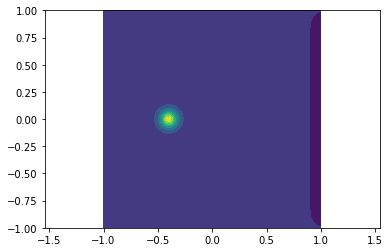

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams["animation.html"] = "jshtml"

xl, xr = -1, 1
yl, yr = -1, 1

n = 100
h = 2/n
dt = (h**2)/4
t = 0
a = 1

x = np.linspace(xl, xr, n)
y = np.linspace(yl, yr, n)
X, Y = np.meshgrid(x,y)
dx = x[1] - x[0]

T = np.ones(X.shape) + np.where(x>0, np.exp(- ((X*X + Y*Y)**0.5 - 0.5)**2/ (2*0.03*0.03) )*100, 0)
Tn = T.copy()

fig = plt.figure()
ax = plt.axes(xlim=(xl, xr), ylim=(yl, yr))
plt.axis('equal')
cnt = plt.contourf(X, Y, T)


k = dt * (a**2) / (dx**2)

def f(x, y):
    return np.exp(- ((x + 0.4)**2 + y**2)/ (2*0.03*0.03) )*1000000

def steps(count=1):
    global T
    global Tn
    global t
    for _ in range(count):
        T[1:-1,-1]  = dx * (-50) + T[1:-1, -2]
        Tn[1:-1,1:-1] = T[1:-1,1:-1] + k * (T[2:,1:-1] + T[1:-1,2:] - 4*T[1:-1,1:-1] + T[:-2,1:-1] + T[1:-1,:-2]) + dt * f(X[1:-1,1:-1],Y[1:-1,1:-1])
        T, Tn = Tn, T
        t += dt
        
def animate(frame):
    global cnt
    steps(1)
    cnt = plt.contourf(X, Y, T)
    return cnt
  

anim = animation.FuncAnimation(fig, animate, frames=50)
anim

# Задача 2. Полуручная оцифровка графика

In [2]:
import matplotlib.image as mpimg
%matplotlib inline

### Посмотрим на исходный график

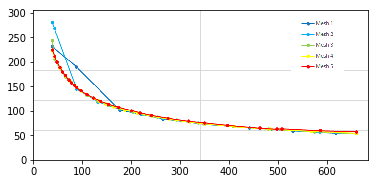

In [5]:

img = mpimg.imread('plate_heat_transfer_crop.png')[::-1,:]
#plt.figure(figsize=(12,8))
plt.imshow(img, origin='lower')
plt.show();

### Конвертируем картинку в grayscale для поиска крайних точек. Координаты этих точек в координатной сетке известны. 

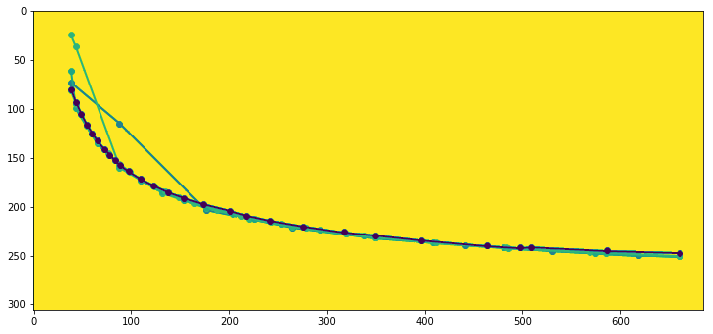

In [370]:
from PIL import Image
import cv2

data = cv2.imread('plate_heat_transfer_crop.png')

data[data[:,:,0,] == int(0.851*255)] = 255 ## очистим от сетки
data[:150,500:,] = 255 ## очистим от легенды

data_gray = cv2.cvtColor(data.copy(), cv2.COLOR_RGB2GRAY)


#data_gray[data_gray == 255] = 0

#thresh = cv2.threshold(data_gray, 120, 255, cv2.THRESH_BINARY)[1]
#im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

## посмотрим, что получилось
plt.figure(figsize=(12,8))
plt.imshow(data_gray)
plt.show()

In [371]:
data_gray.shape

(306, 685)

In [372]:
data_gray[data_gray == 255] = 0

## найдем индексы xmin
x_min = 0
for i in range(35, 50):
    for j in range(65, 90):
        if data_gray[j,i] > 0 and x_min == 0:
            x_min = (i, j)
        

## найдем индексы xmax
x_max = 0
for i in range(680, 660, -1):
    for j in range(260, 250, -1):
        if data_gray[j,i] > 0 and x_max == 0:
            x_max = (i, j)

## найдем индексы ymin
y_min = 0
for i in range(680, 540, -1):
    for j in range(260, 250, -1):
        if data_gray[j,i] > 0 and y_min == 0:
            y_min = (i, j)

## найдем индексы ymax
y_max = 0
for j in range(20, 50):
    for i in range(20, 50):
        if data_gray[j,i] > 0 and y_max == 0:
            y_max = (i, j)

((36, 72), (664, 253)) ((664, 253), (37, 22))


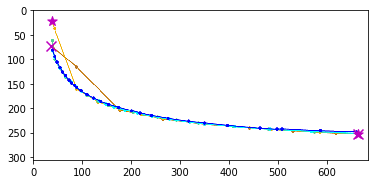

In [373]:
print((x_min, x_max), (y_min, y_max))

## посмотрим на найденные точки
plt.imshow(data)
plt.scatter(x_min[0], x_min[1], color='m', s=100, marker='x')
plt.scatter(x_max[0], x_max[1], color='m', s=100, marker='x')
plt.scatter(y_min[0], y_min[1], color='m', s=100, marker='*')
plt.scatter(y_max[0], y_max[1], color='m', s=100, marker='*')
plt.show()

In [374]:
delta_pix_x = x_max[0] - x_min[0]
delta_x = 25.0

## x = k_x * x_pix --- перегон величин 
k_x = delta_x / delta_pix_x


delta_pix_y = abs(y_max[1] - y_min[1])
delta_y = 0.3

## y = k_y * y_pix --- перегон величин
k_y = delta_y / delta_pix_y

In [375]:
(k_x, k_y)
(0.851,0.851,0.851,1) 

(0.851, 0.851, 0.851, 1)

<IPython.core.display.Javascript object>


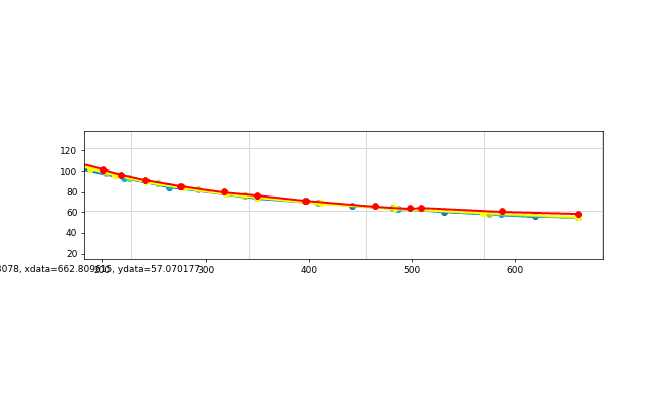

In [397]:
%matplotlib notebook

img = mpimg.imread('plate_heat_transfer_crop.png')[::-1,:]

x_pix_0 = x_min[0]
y_pix_0 = 300 - y_min[1]

plt.imshow(img, origin='lower')
fig = plt.gcf()
ax = plt.gca()
text = ax.text(0,0, "", va="bottom", ha="left")

X = []
Y = []
def onclick(event):
    x_pix, y_pix = event.xdata, event.ydata
    x = (x_pix - x_pix_0) * k_x
    y = (y_pix - y_pix_0) * k_y
    X.append(x)
    Y.append(y)
    tx = 'x=%f, y=%f, xdata=%f, ydata=%f' % (x, y, x_pix, y_pix)
    text.set_text(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


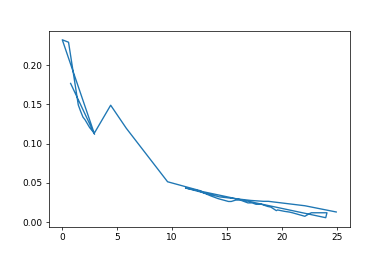

In [400]:
plt.plot(X, Y)
plt.show()